In [1]:
import autograd.numpy as np
from autograd import grad, jacobian
import autograd.numpy.random as npr

from matplotlib import pyplot as plt
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

In [23]:
# Parameters
nx = 10
ny = 10
nt  = 50
xmin = 0
xmax = 2
ymin = 0
ymax = 1
rho = 1
nu = .1
dt = .001

dx = 2.0 / (nx - 1)
dy = 2.0 / (ny - 1)

# Initialization
p  = np.zeros((ny, nx))
pd = np.zeros((ny, nx))
b  = np.zeros((ny, nx))
x  = np.linspace(xmin, xmax, nx)
y  = np.linspace(xmin, xmax, ny)
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))

# Source
b[int(ny / 4), int(nx / 4)]  = 100
b[int(3 * ny / 4), int(3 * nx / 4)] = -10

In [24]:
#Baymani, Modjtaba, Asghar Kerayechian, and Sohrab Effati. 
#"Artificial neural networks approach for solving stokes problem." Applied Mathematics 1, no. 04 (2010): 288-292
def analytic_solution_u(x,y):
    u = 10*np.power(x,2)*y*np.power(1-x,2)*(1-3*y+2*np.power(y,2))
    return u
def analytic_solution_v(x,y):
    v = -10*np.power(y,2)*x*np.power(1-y,2)*(1-3*x+2*np.power(x,2))
    return v
def analytic_solution_p(x,y):
    p = 5*(np.power(x,2)-np.power(y,2))
    return p

surface = np.zeros((ny, nx))

#print("(x,y)"+"**"+"P_Analytical")
for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        surface[i][j] = analytic_solution_p(xi, yj)
 #       print("("+str(x)+","+str(y)+")**"+str(surface))

print("done")

done


In [25]:
#http://nbviewer.jupyter.org/github/barbagroup/CFDPython/blob/master/lessons/15_Step_11.ipynb
def build_up_b(b, rho, dt, u, v, dx, dy):
    
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                     (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))

    return b

def pressure_poisson(p, dx, dy, b):
    
    for it in range(nt):
        pn = np.empty_like(p)
        pn = p.copy()

        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                              (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                              (2 * (dx**2 + dy**2)) -
                              dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                              b[1:-1,1:-1])

        p[0, :] = 0.
        p[ny-1, :] = 0.
        p[:, 0] = 0.
        p[:, nx-1] = 0.
    return p
    
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                         un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                       (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                       (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

        u[0, :] = 0
        u[:, 0] = 0
        u[:, -1] = 0
        u[-1, :] = 1    #set velocity on cavity lid equal to 1
        v[0, :] = 0
        v[-1, :]=0
        v[:, 0] = 0
        v[:, -1] = 0
        
    return p    
    #return u, v, p

p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)    
print("done")

done


In [26]:
#https://becominghuman.ai/neural-networks-for-solving-differential-equations-fa230ac5e04c
def p(x,y):
    return 5*(np.power(x,2)-np.power(y,2))

def g0(x):
    return p(x,0)

def g1(x):
    return p(x,1)

def h0(y):
    return p(0,y)

def h1(y):
    return p(1,y)

def f(x):
    return 0.

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def neural_network_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def A2(x):
    return x[1] * np.sin(np.pi * x[0])

def A(x): #from paper
    part_1 = (1-x[0])*h0(x[1])+x[0]*h1(x[1])
    part_2 = (1-x[1])*(g0(x[0])-((1-x[0])*(g0(0))+x[0]*g0(1)))
    part_3 = y*(g1(x[0])-((1-x[0])*g1(0)+x[0]*g1(1)))
    return part_1+part_2+part_3

def p_trial(x, net_out):
    return A(x) + x[0] * (1 - x[0]) * x[1] * (1 - x[1]) * net_out


def loss_function(W, x, y):
    loss_sum = 0.
    
    for xi in x:
        for yi in y:
            
            input_point = np.array([xi, yi])
            
            net_out = neural_network(W, input_point)[0]

            net_out_jacobian = jacobian(neural_network_x)(input_point)
            net_out_hessian = jacobian(jacobian(neural_network_x))(input_point)
            
            p_t = p_trial(input_point, net_out)
            p_t_jacobian = jacobian(p_trial)(input_point, net_out)
            p_t_hessian = jacobian(jacobian(p_trial))(input_point, net_out)

            gradient_of_trial_d2x = p_t_hessian[0][0]
            gradient_of_trial_d2y = p_t_hessian[1][1]

            func = f(input_point) # right part function

            err_sqr = np.power(((gradient_of_trial_d2x + gradient_of_trial_d2y) - func),2)
            loss_sum += err_sqr
        
    return loss_sum

W = [npr.randn(2, 10), npr.randn(10, 1)]
lmb = 0.001

print neural_network(W, np.array([1, 1]))

x_space  = np.linspace(xmin, xmax, nx)
y_space  = np.linspace(xmin, xmax, ny)

for i in range(100):
    loss_grad =  grad(loss_function)(W, x_space, y_space)
    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]

print loss_function(W, x_space, y_space)

surface_p_nn = np.zeros((ny, nx))

#print("(x,y)"+"**"+"P_NN")
for i, x in enumerate(x_space):
    for j, y in enumerate(y_space):
        net_outt = neural_network(W, [x, y])[0]
        surface_p_nn[i][j] = p_trial([x, y], net_outt)
        #print("("+str(x)+","+str(y)+")**"+str(surface_p_nn[i][j]))

print("done")

[-0.59136315]


TypeError: Grad only applies to real scalar-output functions. Try jacobian or elementwise_grad.

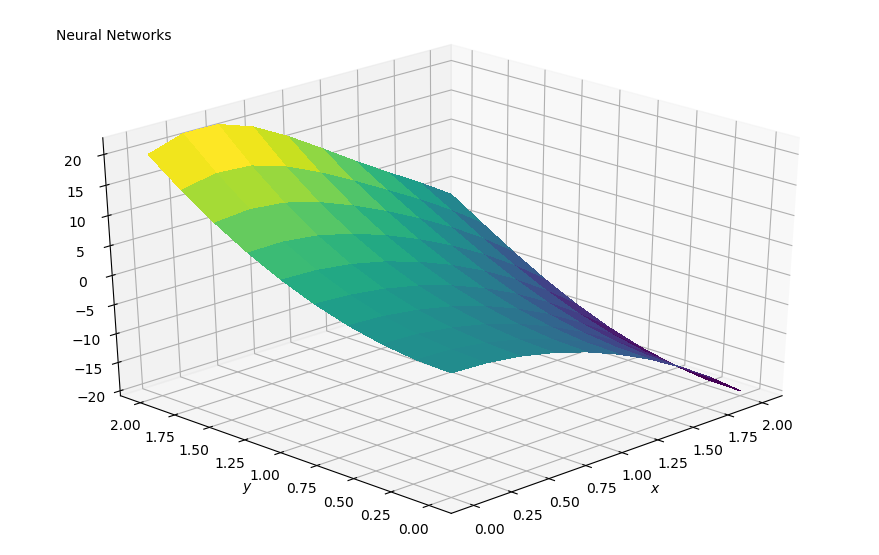

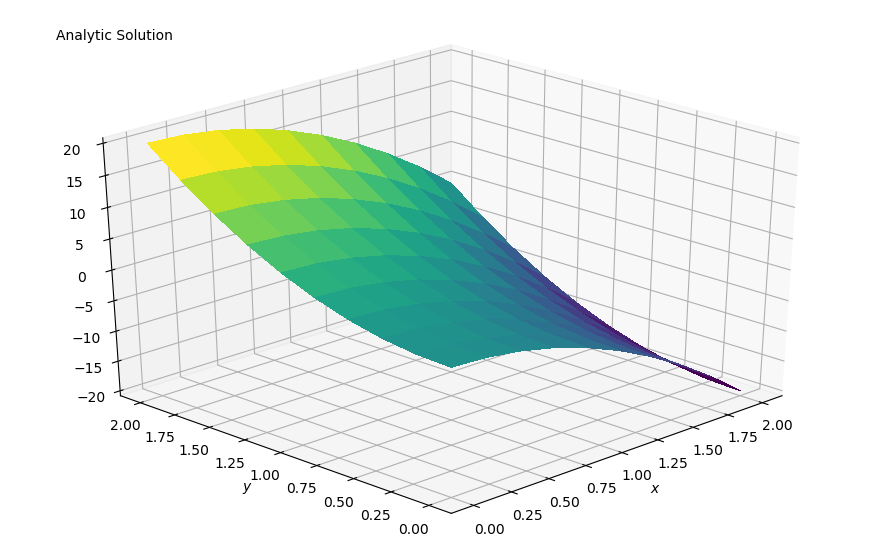

In [28]:
def plot2D(x, y, p,title):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.text2D(0.05, 0.95, title, transform=ax.transAxes)

x_space  = np.linspace(xmin, xmax, nx)
y_space  = np.linspace(xmin, xmax, ny)

plot2D(x_space,y_space,surface_p_nn,"Neural Networks")
plot2D(x_space,y_space,surface,"Analytic Solution")
#plot2D(x_space,y_space,p,"Finite Difference Solution")

In [18]:
print("(x,y)"+"**"+"P_NN"+"**"+"P_Analytical")
for i, x in enumerate(x_space):
    for j, y in enumerate(y_space):
        print("("+str(x)+","+str(y)+")**"+str(surface_p_nn[i][j])+"**"+str(surface[i][j]))

(x,y)**P_NN**P_Analytical
(0.0,0.0)**0.0**0.0
(0.0,0.2222222222222222)**-0.24691358024691357**-0.24691358024691357
(0.0,0.4444444444444444)**-0.9876543209876543**-0.9876543209876543
(0.0,0.6666666666666666)**-2.2222222222222223**-2.2222222222222223
(0.0,0.8888888888888888)**-3.950617283950617**-3.950617283950617
(0.0,1.1111111111111112)**-6.17283950617284**-6.17283950617284
(0.0,1.3333333333333333)**-8.88888888888889**-8.88888888888889
(0.0,1.5555555555555554)**-12.098765432098762**-12.098765432098762
(0.0,1.7777777777777777)**-15.802469135802468**-15.802469135802468
(0.0,2.0)**-20.0**-20.0
(0.2222222222222222,0.0)**0.24691358024691357**0.24691358024691357
(0.2222222222222222,0.2222222222222222)**0.0931383933157343**0.0
(0.2222222222222222,0.4444444444444444)**-0.6680459193919965**-0.7407407407407407
(0.2222222222222222,0.6666666666666666)**-1.9224846033080114**-1.9753086419753085
(0.2222222222222222,0.8888888888888888)**-3.6838651411689276**-3.7037037037037033
(0.2222222222222222,1.11